In [ ]:
## Connect to gg driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI Tutor/CV/Topic3: Object Detection/Day07

/content/drive/.shortcut-targets-by-id/1g_hBCGxmI5lTFXyvD-igJcroxCjDzObt/AI Tutor/CV/Topic3: Object Detection/Day07


In [ ]:
from torchvision.ops import nms
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import torch
fontsize = 30
font = ImageFont.truetype("Arial.ttf", fontsize)

In [ ]:
path_image = "never-gonna-give-you-up.webp"
idx2tag = {0: 'Head', 1: 'Mic'}
idx2color = {0: 'red', 1: 'blue'}

## Original

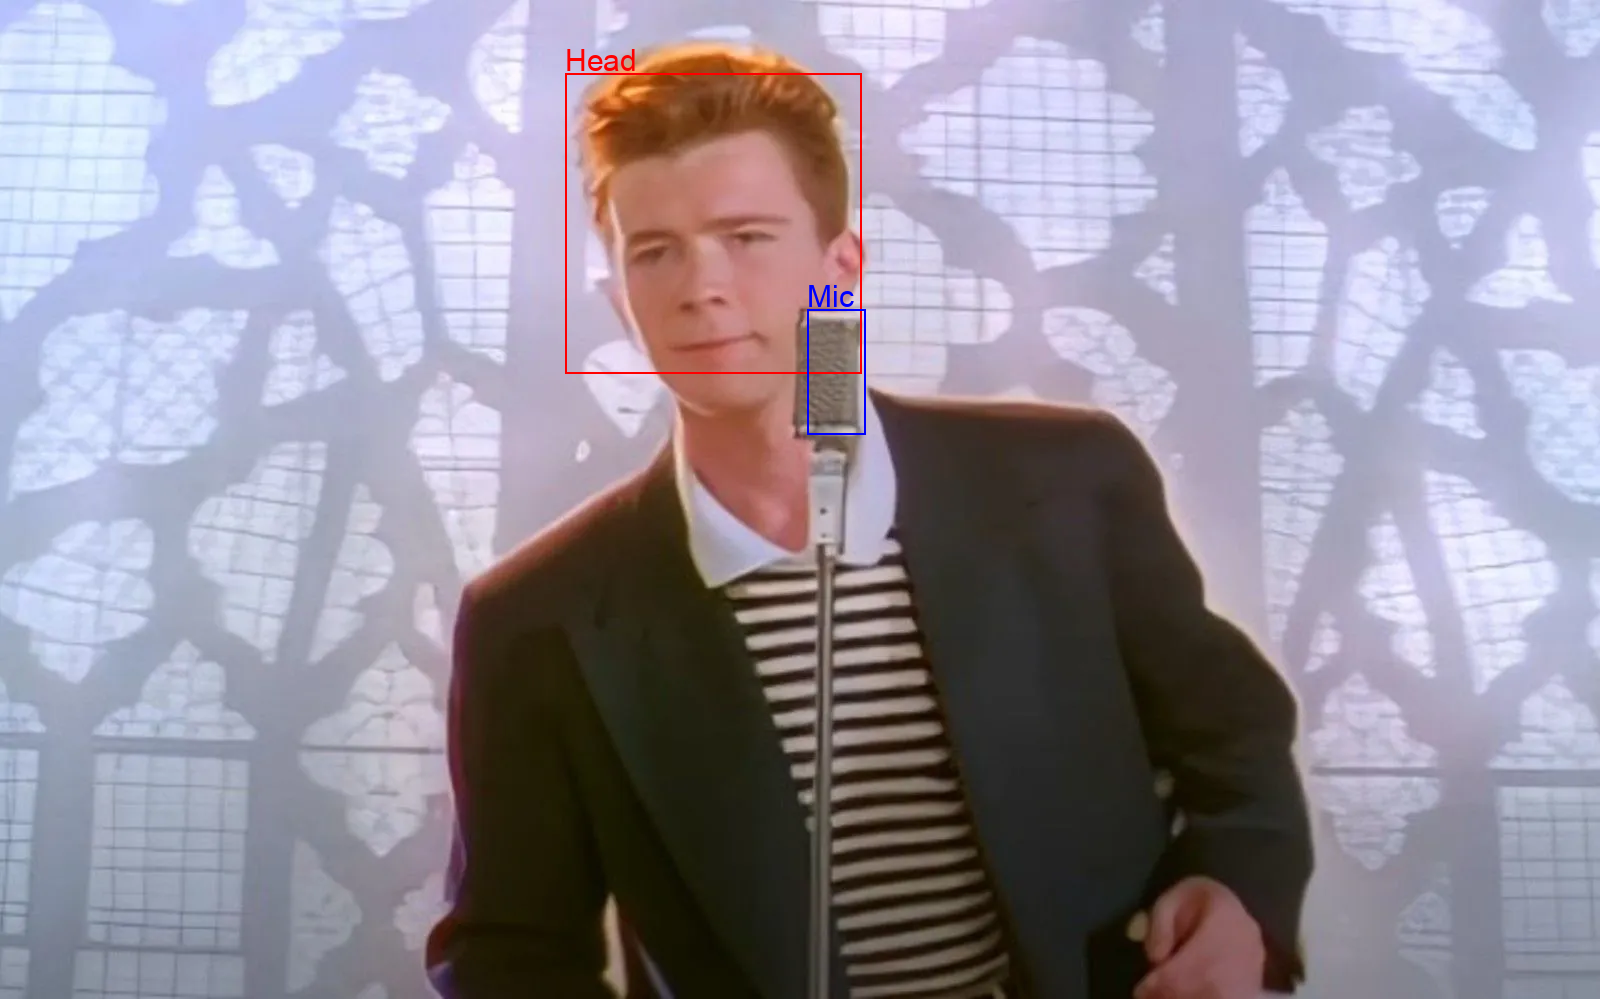

In [ ]:
original_bboxes =np.array([
    [0.353125, 0.07307307307307308, 0.53875, 0.3733733733733734, 0],
    [0.504375, 0.30930930930930933, 0.540625, 0.4344344344344344, 1]
])
# Create a drawing object
img = Image.open(path_image)
w,h = img.size
original_bboxes[:, 0] *= w  # Scale x1
original_bboxes[:, 2] *= w  # Scale x2
original_bboxes[:, 1] *= h  # Scale y1
original_bboxes[:, 3] *= h  # Scale y2
draw = ImageDraw.Draw(img)
for pred in original_bboxes:
    bbox  = pred[:4].tolist()
    label = pred[4]record là anh quay 2 tiếng tầm 500mb
    class_name = idx2tag[label]
    color = idx2color[label]
    draw.rectangle(bbox, outline=color, width=2)
    draw.text((bbox[0], bbox[1]-fontsize), class_name, fill=color, font=font)
img

## Predict

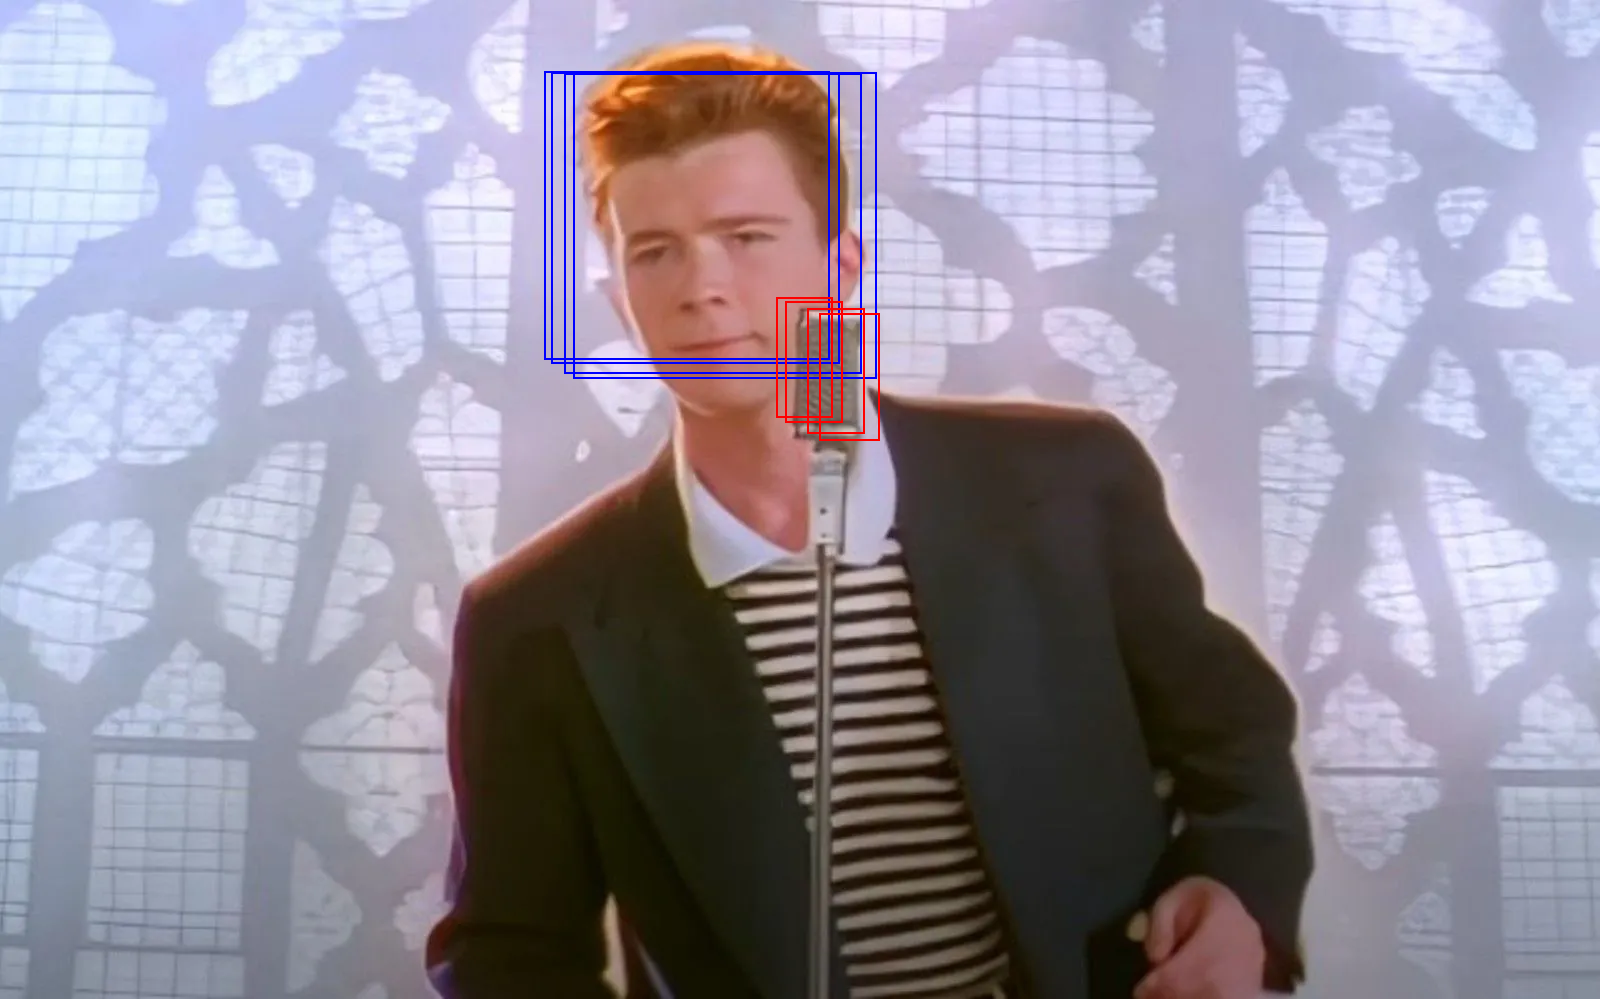

In [ ]:
pred_bboxes = np.array([
    [0.3531, 0.0731, 0.5387, 0.3734, 1, 0.98],
    [0.3400, 0.0712, 0.5182, 0.3594, 1, 0.85],
    [0.3445, 0.0729, 0.5246, 0.3642, 1, 0.5],
    [0.3582, 0.0725, 0.5475, 0.3788, 1, 0.2],
    [0.5044, 0.3093, 0.5406, 0.4344, 0, 0.95],
    [0.4852, 0.2979, 0.5200, 0.4181, 0, 0.92],
    [0.4912, 0.3020, 0.5264, 0.4234, 0, 0.3],
    [0.5125, 0.3135, 0.5494, 0.4411, 0, 0.1]
])
# Create a drawing object
img = Image.open(path_image)
w,h = img.size
pred_bboxes[:, 0] *= w  # Scale x1
pred_bboxes[:, 2] *= w  # Scale x2
pred_bboxes[:, 1] *= h  # Scale y1
pred_bboxes[:, 3] *= h  # Scale y2
draw = ImageDraw.Draw(img)
for pred in pred_bboxes:
    bbox  = pred[:4].tolist()
    label = pred[4]
    #class_name = idx2tag[label]
    color = idx2color[label]
    draw.rectangle(bbox, outline=color, width=2)
    #draw.text((bbox[0], bbox[1]-fontsize), class_name, fill=color, font=font)
img

## NMS

In [ ]:
pred_bboxes = np.array([
    #x1,      y1,    x2,     y2,     cls, score
    [0.3531, 0.0731, 0.5387, 0.3734, 1, 0.98],
    [0.3400, 0.0712, 0.5182, 0.3594, 1, 0.85],
    [0.3445, 0.0729, 0.5246, 0.3642, 1, 0.5],
    [0.3582, 0.0725, 0.5475, 0.3788, 1, 0.2],
    [0.5044, 0.3093, 0.5406, 0.4344, 0, 0.95],
    [0.4852, 0.2979, 0.5200, 0.4181, 0, 0.92],
    [0.4912, 0.3020, 0.5264, 0.4234, 0, 0.3],
    [0.5125, 0.3135, 0.5494, 0.4411, 0, 0.1]
])

bboxes = torch.tensor(pred_bboxes[:,:4])
scores = torch.tensor(pred_bboxes[:,5])
labels = torch.tensor(pred_bboxes[:,4])

In [ ]:
nms_indices = nms(bboxes, scores, .2)

In [ ]:
bboxes_new = bboxes[nms_indices].numpy()
scores_new = scores[nms_indices].numpy()
labels_new = labels[nms_indices].numpy()

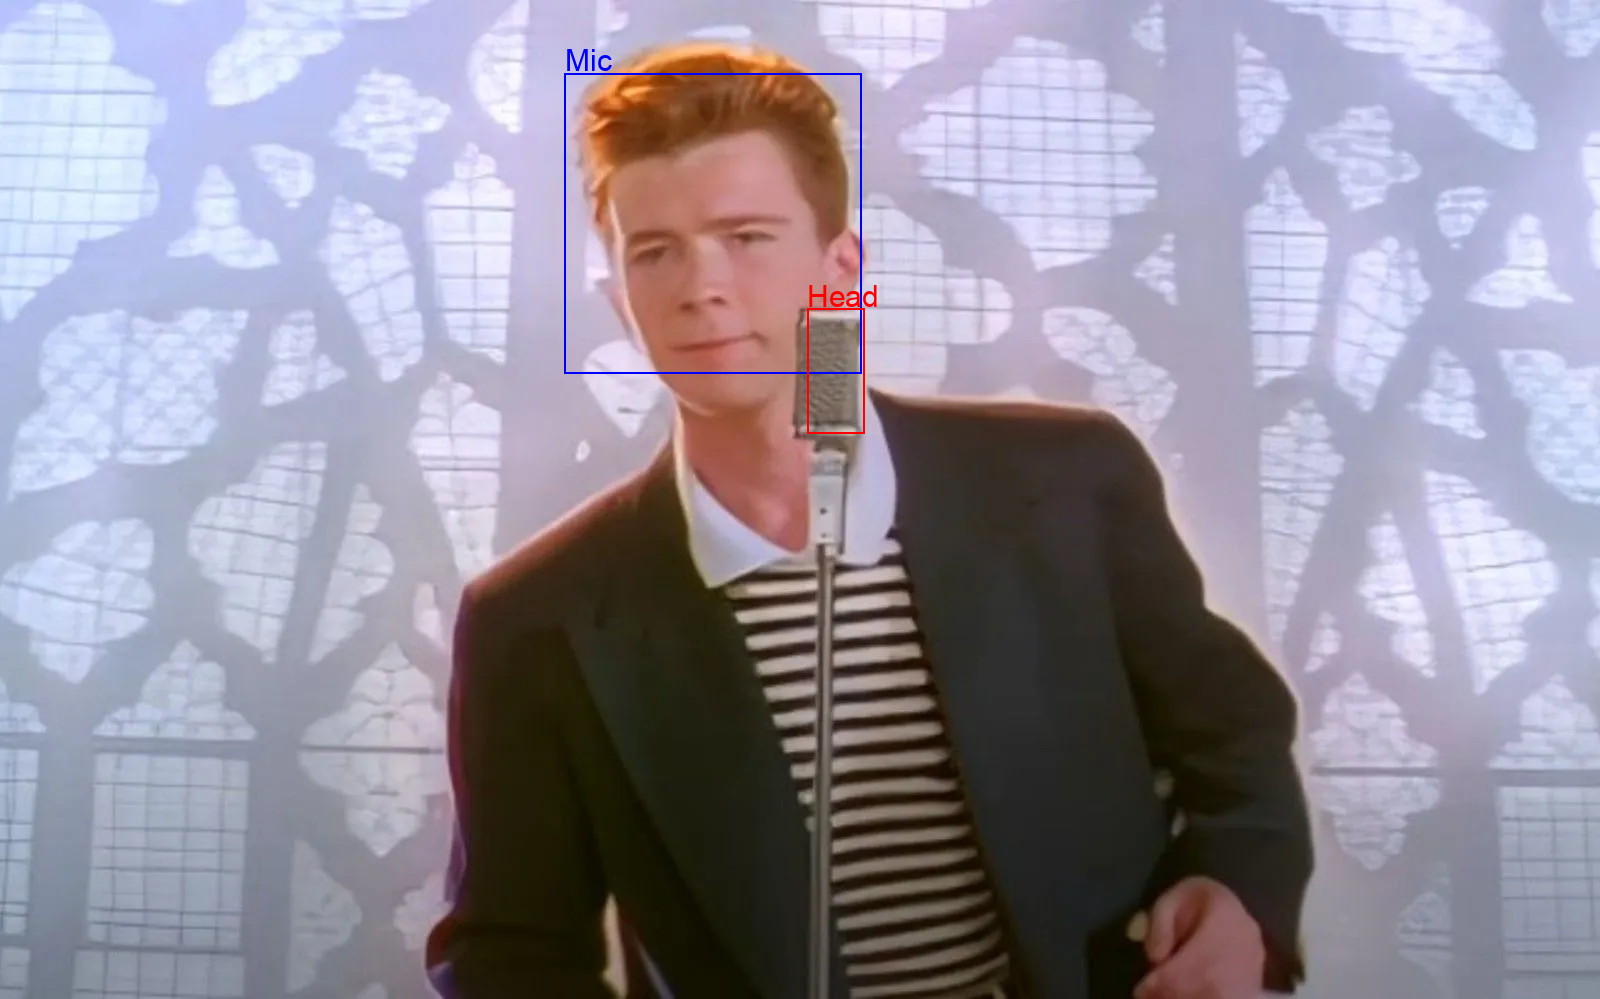

In [ ]:
img = Image.open(path_image)
w,h = img.size
bboxes_new[:, 0] *= w  # Scale x1
bboxes_new[:, 2] *= w  # Scale x2
bboxes_new[:, 1] *= h  # Scale y1
bboxes_new[:, 3] *= h  # Scale y2
draw = ImageDraw.Draw(img)
for bbox, label in list(zip(bboxes_new, labels_new)):
    bbox  = bbox.tolist()
    class_name = idx2tag[label]
    class_name = idx2tag[label]
    color = idx2color[label]
    draw.rectangle(bbox, outline=color, width=2)
    draw.text((bbox[0], bbox[1]-fontsize), class_name, fill=color, font=font)
img

## NMS from scratch

In [ ]:
import numpy as np

def calculate_iou(box1, box2):
    # Calculate intersection coordinates
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    # Calculate union area
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate intersection area
    intersection_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    # TODO:
    # Caculation union area
    union_area = ...
    # Calculate IoU
    iou = ...

    return iou


In [ ]:
box1 = [0.3531, 0.0731, 0.5387, 0.3734]
box2 = [0.3400, 0.0712, 0.5182, 0.3594]
calculate_iou(box1, box2)
#0.7901094178516966

box1 = [0.5044, 0.3093, 0.5406, 0.4344]
box2 = [0.4912, 0.3020, 0.5264, 0.4234]
calculate_iou(box1, box2)
#0.39897007168174026


box1 = [0.3531, 0.0731, 0.5387, 0.3734]
box2 = [0.5125, 0.3135, 0.5494, 0.4411]
calculate_iou(box1, box2)
#0.026656253598742016

0.026656253598742016

In [ ]:

def nms(bboxes, scores, iou_threshold):
    # Tạo một danh sách để lưu trữ các bounding box đã được chọn
    selected_indices = []

    # Sắp xếp các bounding box theo điểm số giảm dần
    sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)

    while len(sorted_indices) > 0:
        # Lấy bounding box có điểm số cao nhất
        current_index = sorted_indices[0]
        selected_indices.append(current_index)

        # TODO
        # Loại bỏ bounding box hiện tại khỏi danh sách sắp xếp
        del ...

        # Tính IoU với các bounding box còn lại và loại bỏ các bounding box trùng lặp
        indices_to_remove = []
        for index in sorted_indices:
            # Tính iou của box hiện tại với các box còn lại
            iou = calculate_iou(bboxes[current_index], bboxes[index])
            if iou >= iou_threshold:
                indices_to_remove.append(index)

        # TODO
        # Loại bỏ các bounding box bị trùng lặp khỏi danh sách sắp xếp
        sorted_indices = ...

    return selected_indices

In [ ]:
pred_bboxes = np.array([
    [0.3531, 0.0731, 0.5387, 0.3734, 1, 0.98],
    [0.3400, 0.0712, 0.5182, 0.3594, 1, 0.85],
    [0.3445, 0.0729, 0.5246, 0.3642, 1, 0.5],
    [0.3582, 0.0725, 0.5475, 0.3788, 1, 0.2],
    [0.5044, 0.3093, 0.5406, 0.4344, 0, 0.95],
    [0.4852, 0.2979, 0.5200, 0.4181, 0, 0.92],
    [0.4912, 0.3020, 0.5264, 0.4234, 0, 0.3],
    [0.5125, 0.3135, 0.5494, 0.4411, 0, 0.1]
])

bboxes = torch.tensor(pred_bboxes[:,:4])
scores = torch.tensor(pred_bboxes[:,5])
labels = torch.tensor(pred_bboxes[:,4])

idx = nms(
    bboxes.numpy(),
    scores.numpy(),
    iou_threshold=0.2
)
bboxes_new = bboxes[idx].numpy()
scores_new = scores[idx].numpy()
labels_new = labels[idx].numpy()

[0, 4, 5, 1, 2, 6, 3, 7]


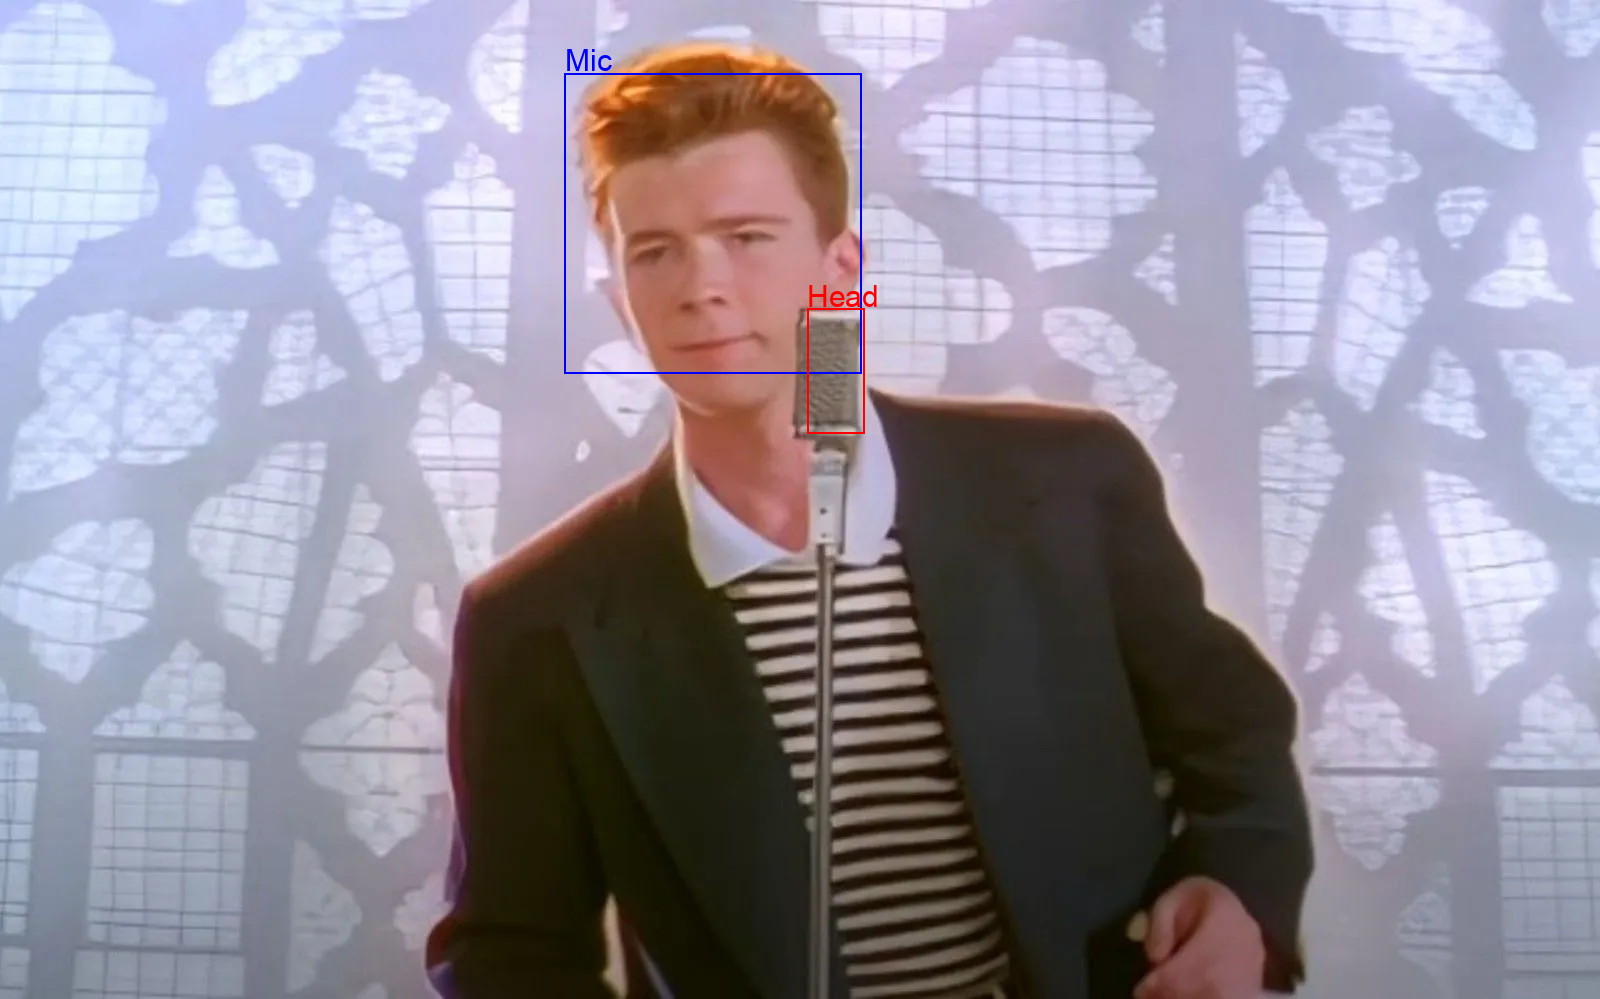

In [ ]:
img = Image.open(path_image)
w,h = img.size
bboxes_new[:, 0] *= w  # Scale x1
bboxes_new[:, 2] *= w  # Scale x2
bboxes_new[:, 1] *= h  # Scale y1
bboxes_new[:, 3] *= h  # Scale y2
draw = ImageDraw.Draw(img)
for bbox, label in list(zip(bboxes_new, labels_new)):
    bbox  = bbox.tolist()
    class_name = idx2tag[label]
    class_name = idx2tag[label]
    color = idx2color[label]
    draw.rectangle(bbox, outline=color, width=2)
    draw.text((bbox[0], bbox[1]-fontsize), class_name, fill=color, font=font)
img